# 2 Exploratory Data Analysis<a id='2_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Exploring Distributions](#2.5.1_Exploring_Distributions)
    * [2.5.2 Exploring Skewed Features](#2.5.2_Exploring_Skewed_Features)
    * [2.5.3 Numerical Distributions](#2.5.3_Numerical_Distributions)
    * [2.5.4 Numerical Relationships](#2.5.4_Numerical_Relationships)
    * [2.5.4 Numerical-Categorical Relationships](#2.5.4_Numerical-Categorical_Relationships)
  * [2.6 Saving The Data](#2.6_Saving_The_Data)
  * [2.7 References](#2.7_References)

## 2.2 Introduction<a id='2.2_Introduction'></a>

The next step of the project will be to explore the data and unravel the relationships between the features as well as their relation to the variable we want to predict, the `repay_fail` column.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',50)

First we import the appropriate libraries. I've set the max columns to be displayed to 25 that way we can view all the columns on any call of the .head() method.

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
wrangled_data = pd.read_csv('../data/processed/loan_default_clean.csv',index_col=0)

In [3]:
wrangled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38415 entries, 3 to 38480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38415 non-null  float64
 1   term                 38415 non-null  object 
 2   int_rate             38415 non-null  float64
 3   installment          38415 non-null  float64
 4   emp_length           38415 non-null  object 
 5   home_ownership       38415 non-null  object 
 6   annual_inc           38415 non-null  float64
 7   verification_status  38415 non-null  object 
 8   purpose              38415 non-null  object 
 9   addr_state           38415 non-null  object 
 10  dti                  38415 non-null  float64
 11  delinq_2yrs          38415 non-null  float64
 12  earliest_cr_line     38415 non-null  object 
 13  inq_last_6mths       38415 non-null  float64
 14  open_acc             38415 non-null  float64
 15  pub_rec              38415 non-null 

In [4]:
wrangled_data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail
3,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,other,MI,19.86,0.0,2000-08-05,5.0,7.0,0.0,981.0,21.3,10.0,0
4,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,7.0,0.0,18773.0,99.9,15.0,1
5,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,other,TX,10.80,3.0,1998-03-01,3.0,7.0,0.0,3269.0,47.2,20.0,0
6,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,7.0,0.0,0.0,0.0,15.0,0
7,3600.0,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,other,AL,1.55,0.0,1998-04-01,4.0,8.0,0.0,0.0,0.0,25.0,0


Notice that the `earlierst_cr_line` column is identified as an object type; however, it should be of datetime format.

In [5]:
wrangled_data.earliest_cr_line.info()

<class 'pandas.core.series.Series'>
Int64Index: 38415 entries, 3 to 38480
Series name: earliest_cr_line
Non-Null Count  Dtype 
--------------  ----- 
38415 non-null  object
dtypes: object(1)
memory usage: 600.2+ KB


As shown, the dtype is object.

In [6]:
wrangled_data.earliest_cr_line = pd.to_datetime(wrangled_data.earliest_cr_line)

In [7]:
wrangled_data.earliest_cr_line.info()

<class 'pandas.core.series.Series'>
Int64Index: 38415 entries, 3 to 38480
Series name: earliest_cr_line
Non-Null Count  Dtype         
--------------  -----         
38415 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 600.2 KB


Now the datatype is correctly datetime.

## 2.5 Explore The Data<a id='2.5_Explore_The_Data'></a>

### 2.5.1 Exploring Distributions<a id='2.5.1_Exploring_Distributions'></a>

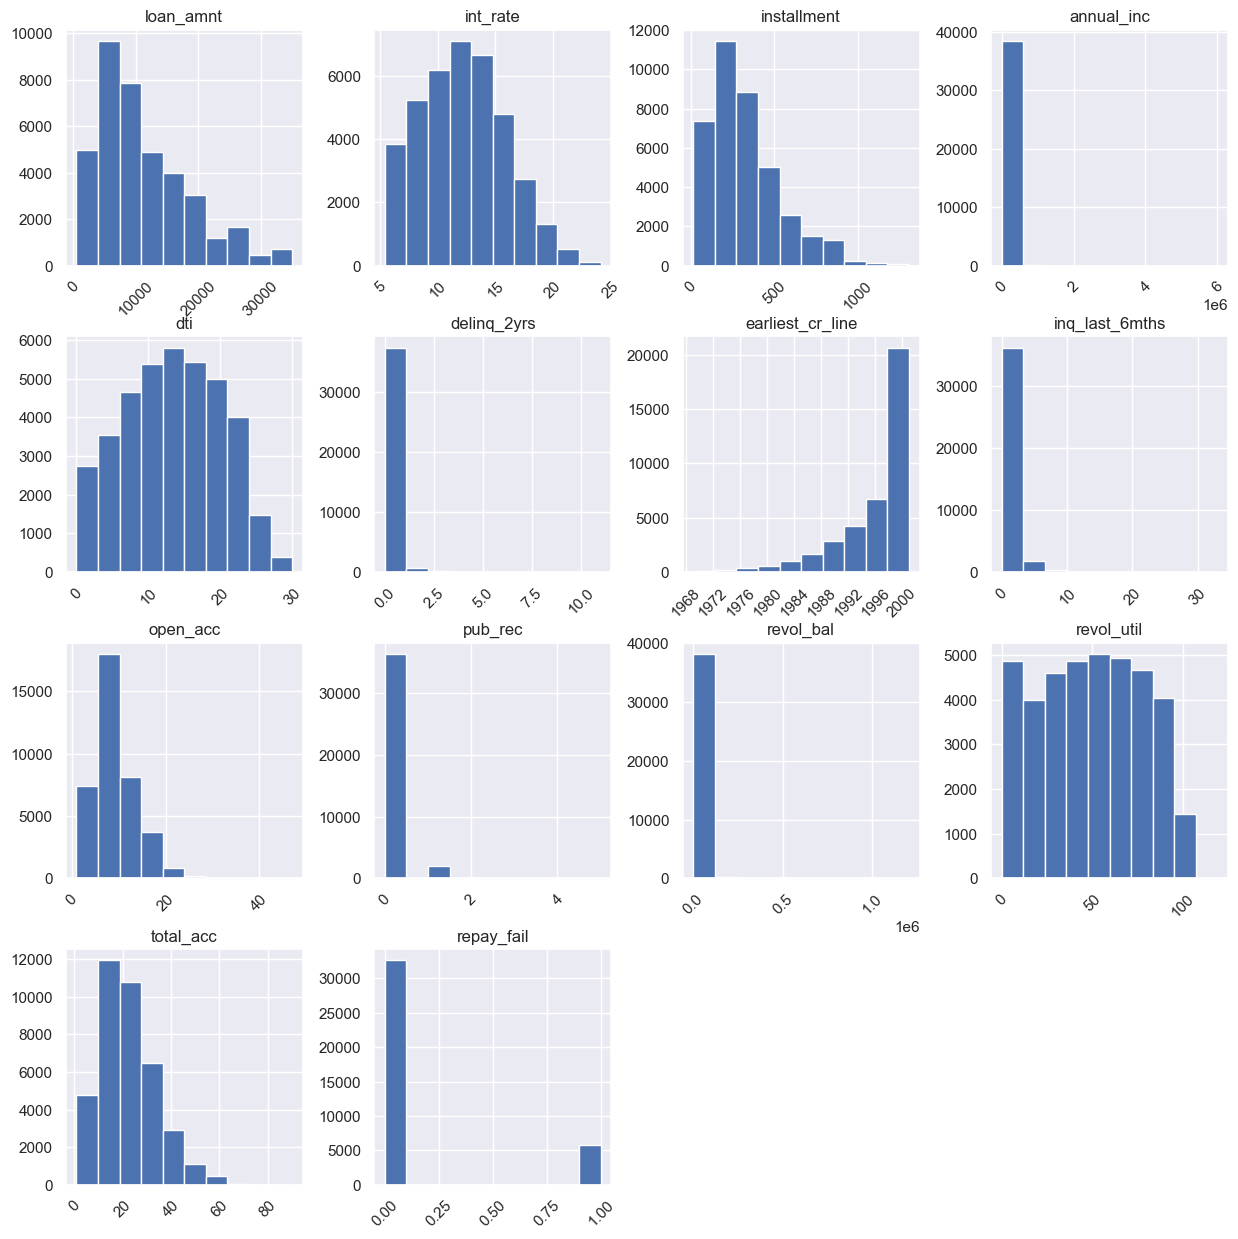

In [8]:
wrangled_data.hist(figsize=(15,15),xrot=45);

We're first displaying histograms of all the numerical columns to get an idea of how everything is distributed. Notably skewed features are `annual_inc`, `delinq_2_yrs`, `inq_last_6mths`, `pub_rec` and `revol_bal`.

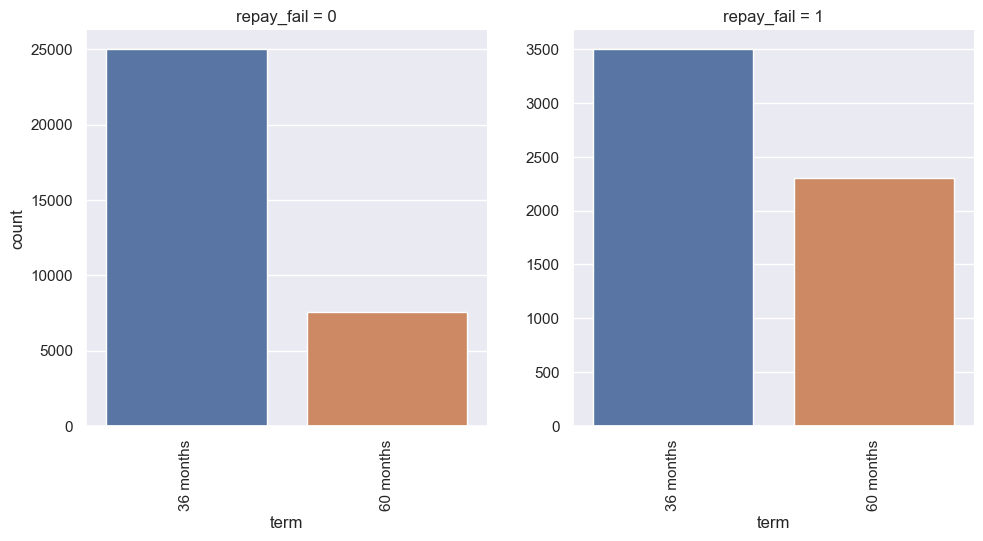

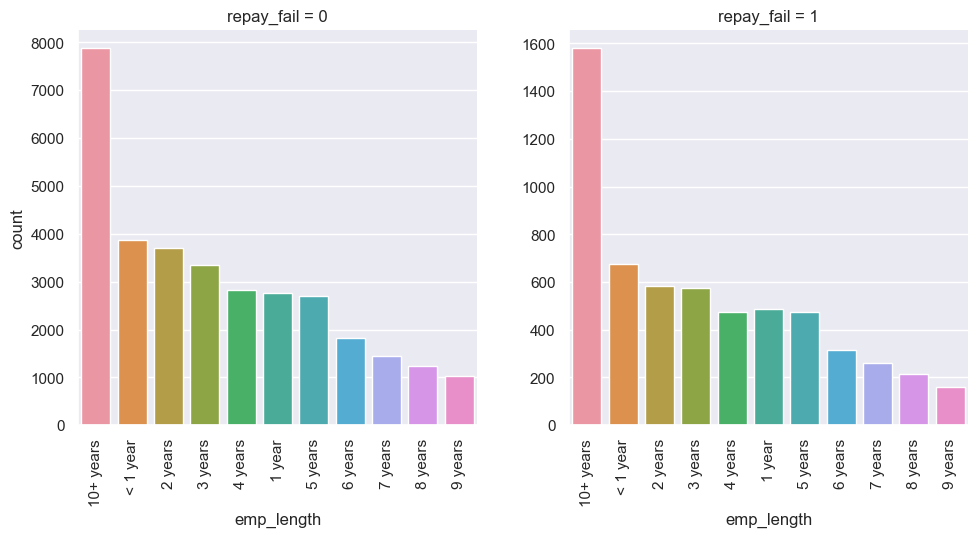

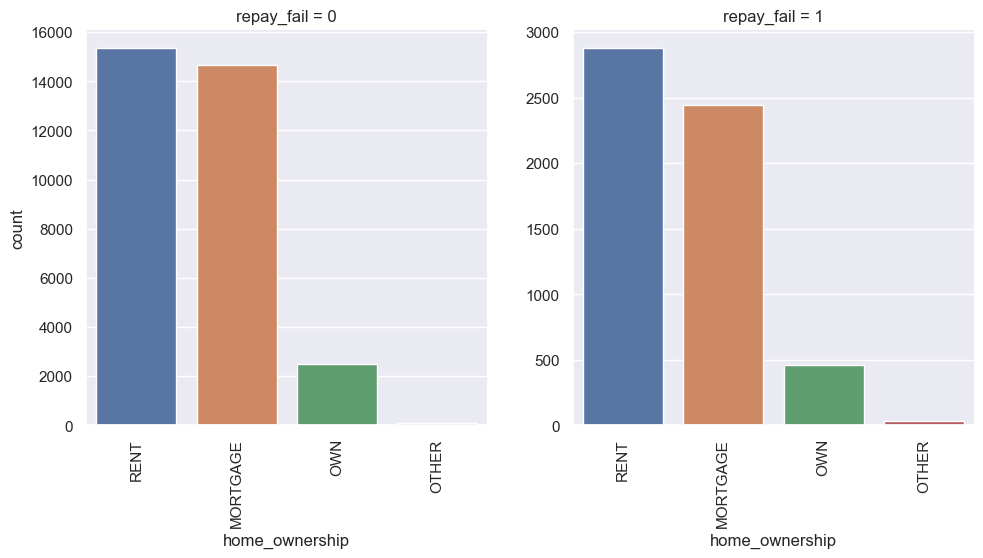

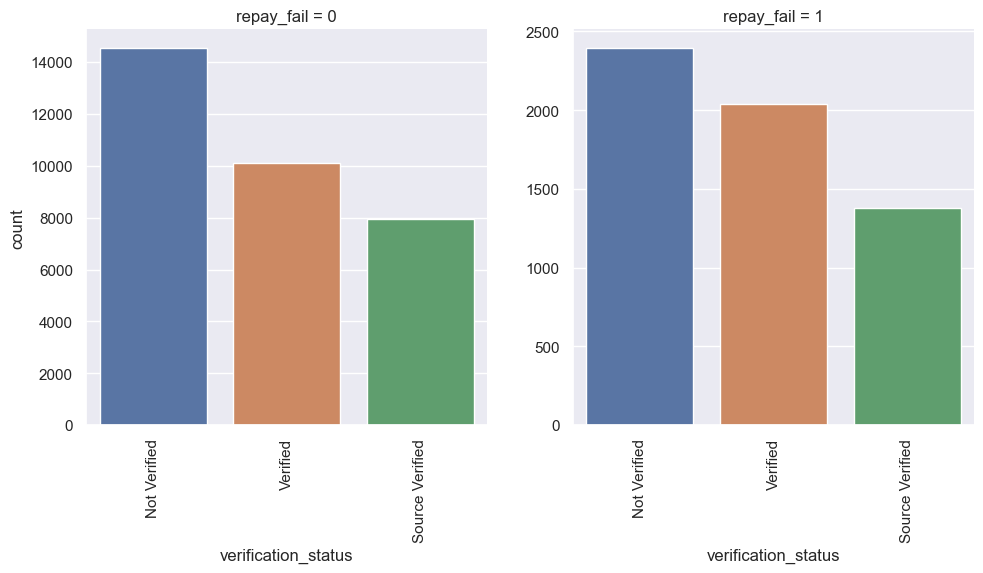

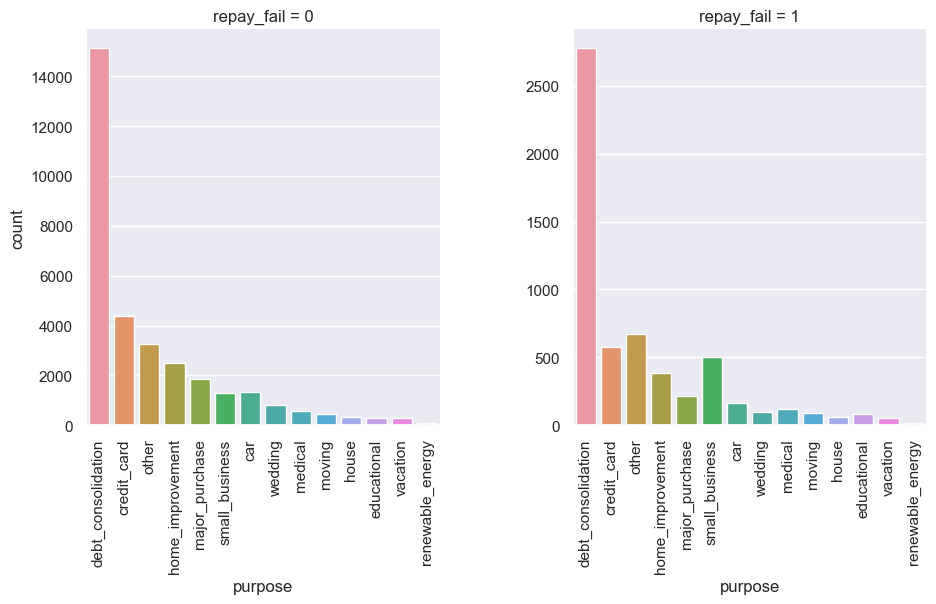

In [9]:
for col in wrangled_data.select_dtypes(include='object'):
    if wrangled_data[col].nunique() <= 20:
        order = wrangled_data[col].value_counts().index
        ax = sns.catplot(x = col, kind='count', col = 'repay_fail', data=wrangled_data, sharey=False,
                        order = order)
        ax.set_xticklabels(rotation=90)
        plt.show()

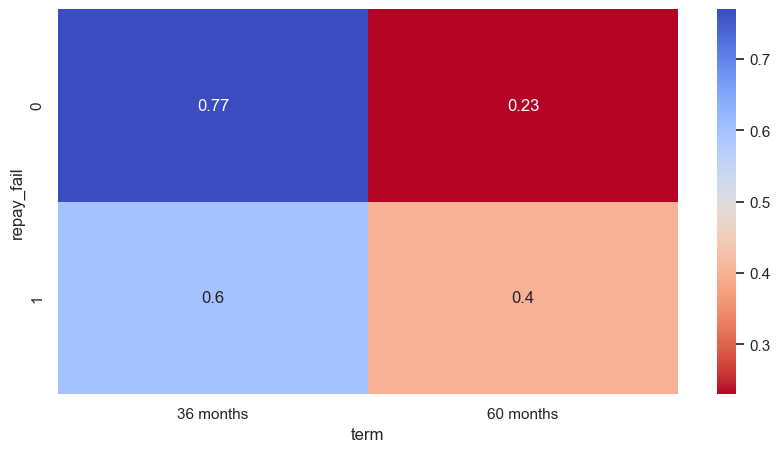

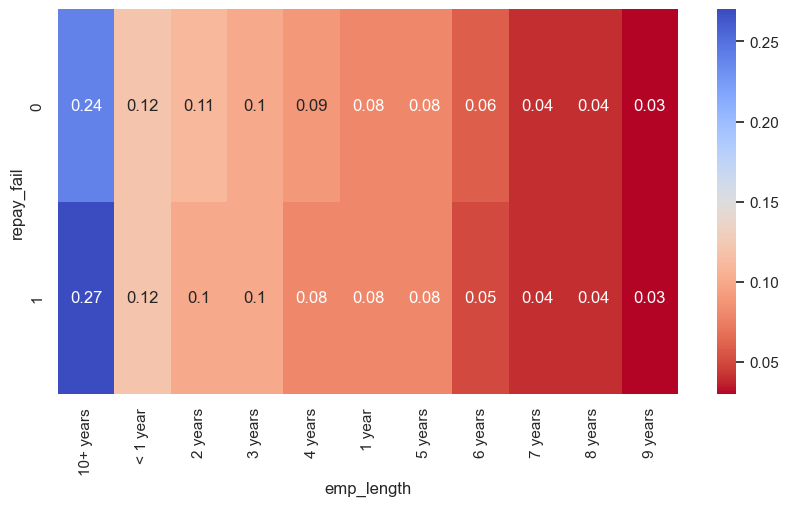

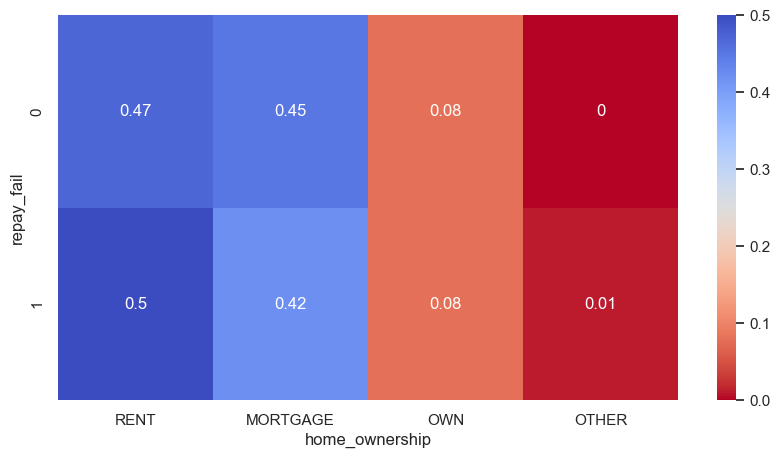

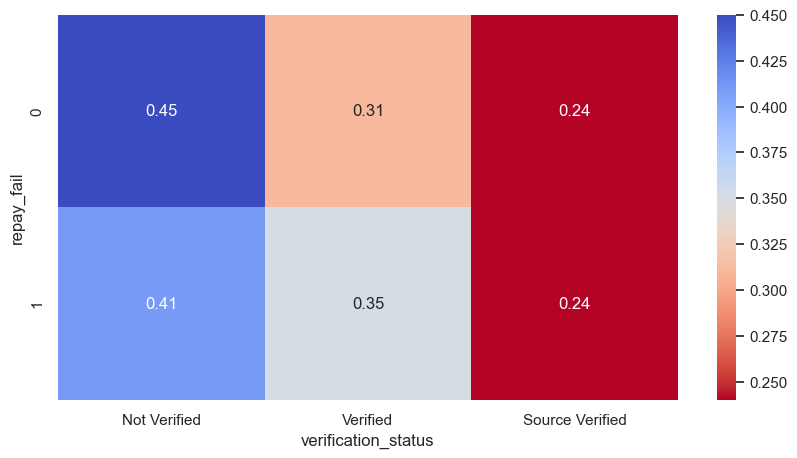

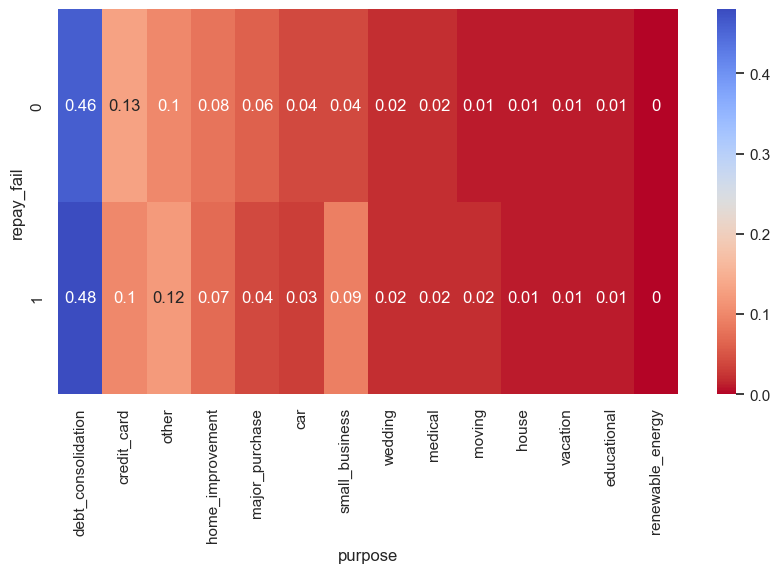

In [10]:
for col in wrangled_data.select_dtypes(include='object'):
    if wrangled_data[col].nunique() <= 20:
        df = pd.crosstab(wrangled_data.repay_fail,wrangled_data[col],normalize='index').T.sort_values(0, ascending=False)
        plt.figure(figsize=(10,5))
        sns.heatmap(df.T.round(2),annot=True, cmap='coolwarm_r');
        plt.show()

Next we're looking at the difference in distributions for categorical features among the defaulted and non-defaulted loans. We are selecting features with less than 20 categories to separate the `addr_state` feature. We also created heatmaps to compare the distribution by showing the percentage of distribution. Recall that `repay_fail` = 1 means the loans defaulted. There are significantly more 60 month term loans in the defaulted loans. This is confirmed by the heatmap as well, showing that 40% of the loans defaulted were 60 month terms, compared to 23% of the non-defaulted. Employment length doesn't change much for defaulted loans. There are a higher proportion of renters that default, as they carry 50% of defaulted loans. Verification status is notably different as well, with more verified in defaulted loans. The purpose of the loan does carry notable differences as well. Loans for small business seem to default more often as well as loans in the 'other' category.

<Figure size 1500x500 with 0 Axes>

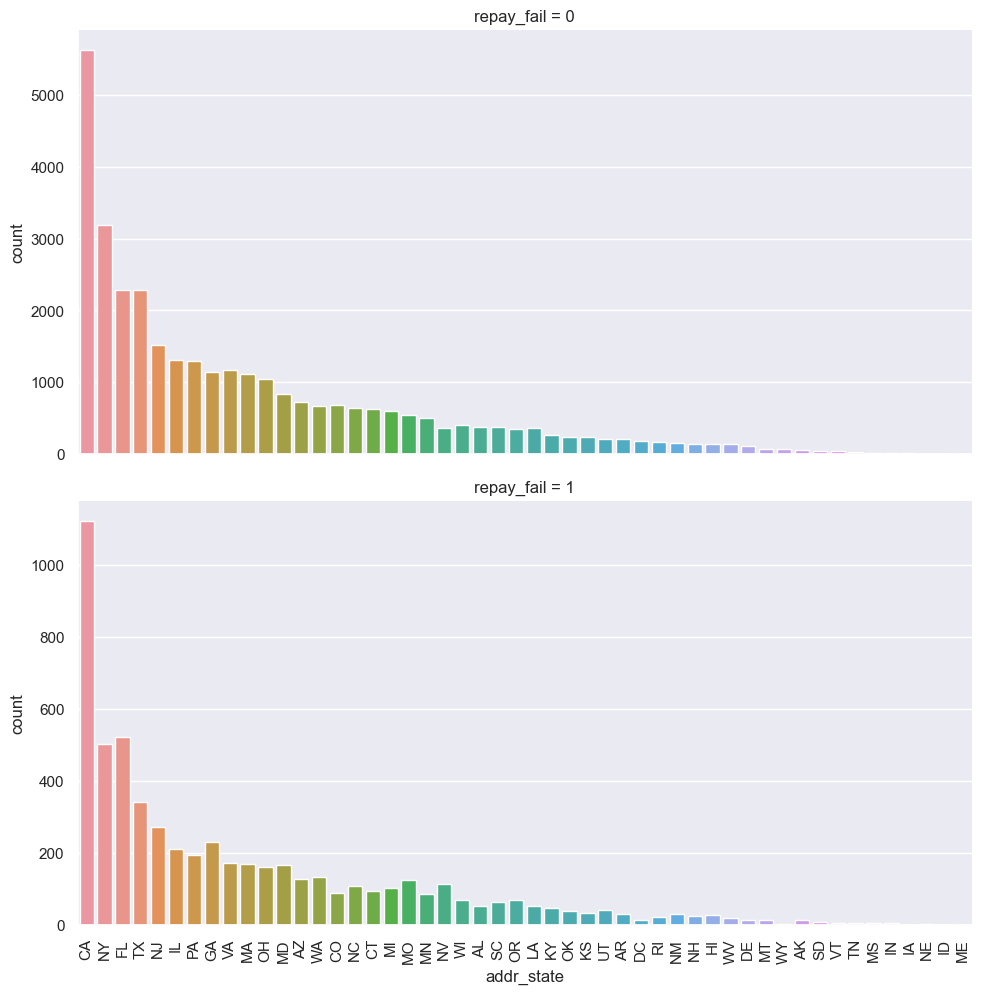

In [11]:
order = wrangled_data['addr_state'].value_counts().index
plt.figure(figsize=(15,5));
ax = sns.catplot(x = 'addr_state', kind='count', row = 'repay_fail', data=wrangled_data, sharey=False, order = order,
                aspect=2);
ax.set_xticklabels(order,rotation=90);
plt.show();

In [12]:
df = pd.crosstab(wrangled_data.repay_fail,wrangled_data['addr_state'],normalize='index').T.sort_values(0, ascending=False)

In [13]:
share_of_loans = wrangled_data.groupby('addr_state').agg({'repay_fail': lambda x: x.count()/len(wrangled_data)})

share_of_loans.reset_index(inplace=True)

share_of_loans.columns = ['addr_state','share']

df.reset_index(inplace=True)

joined_df = df.merge(share_of_loans, on='addr_state')

joined_df = joined_df.set_index('addr_state')

joined_df.columns = ['non-defaulted','defaulted','share_of_total']

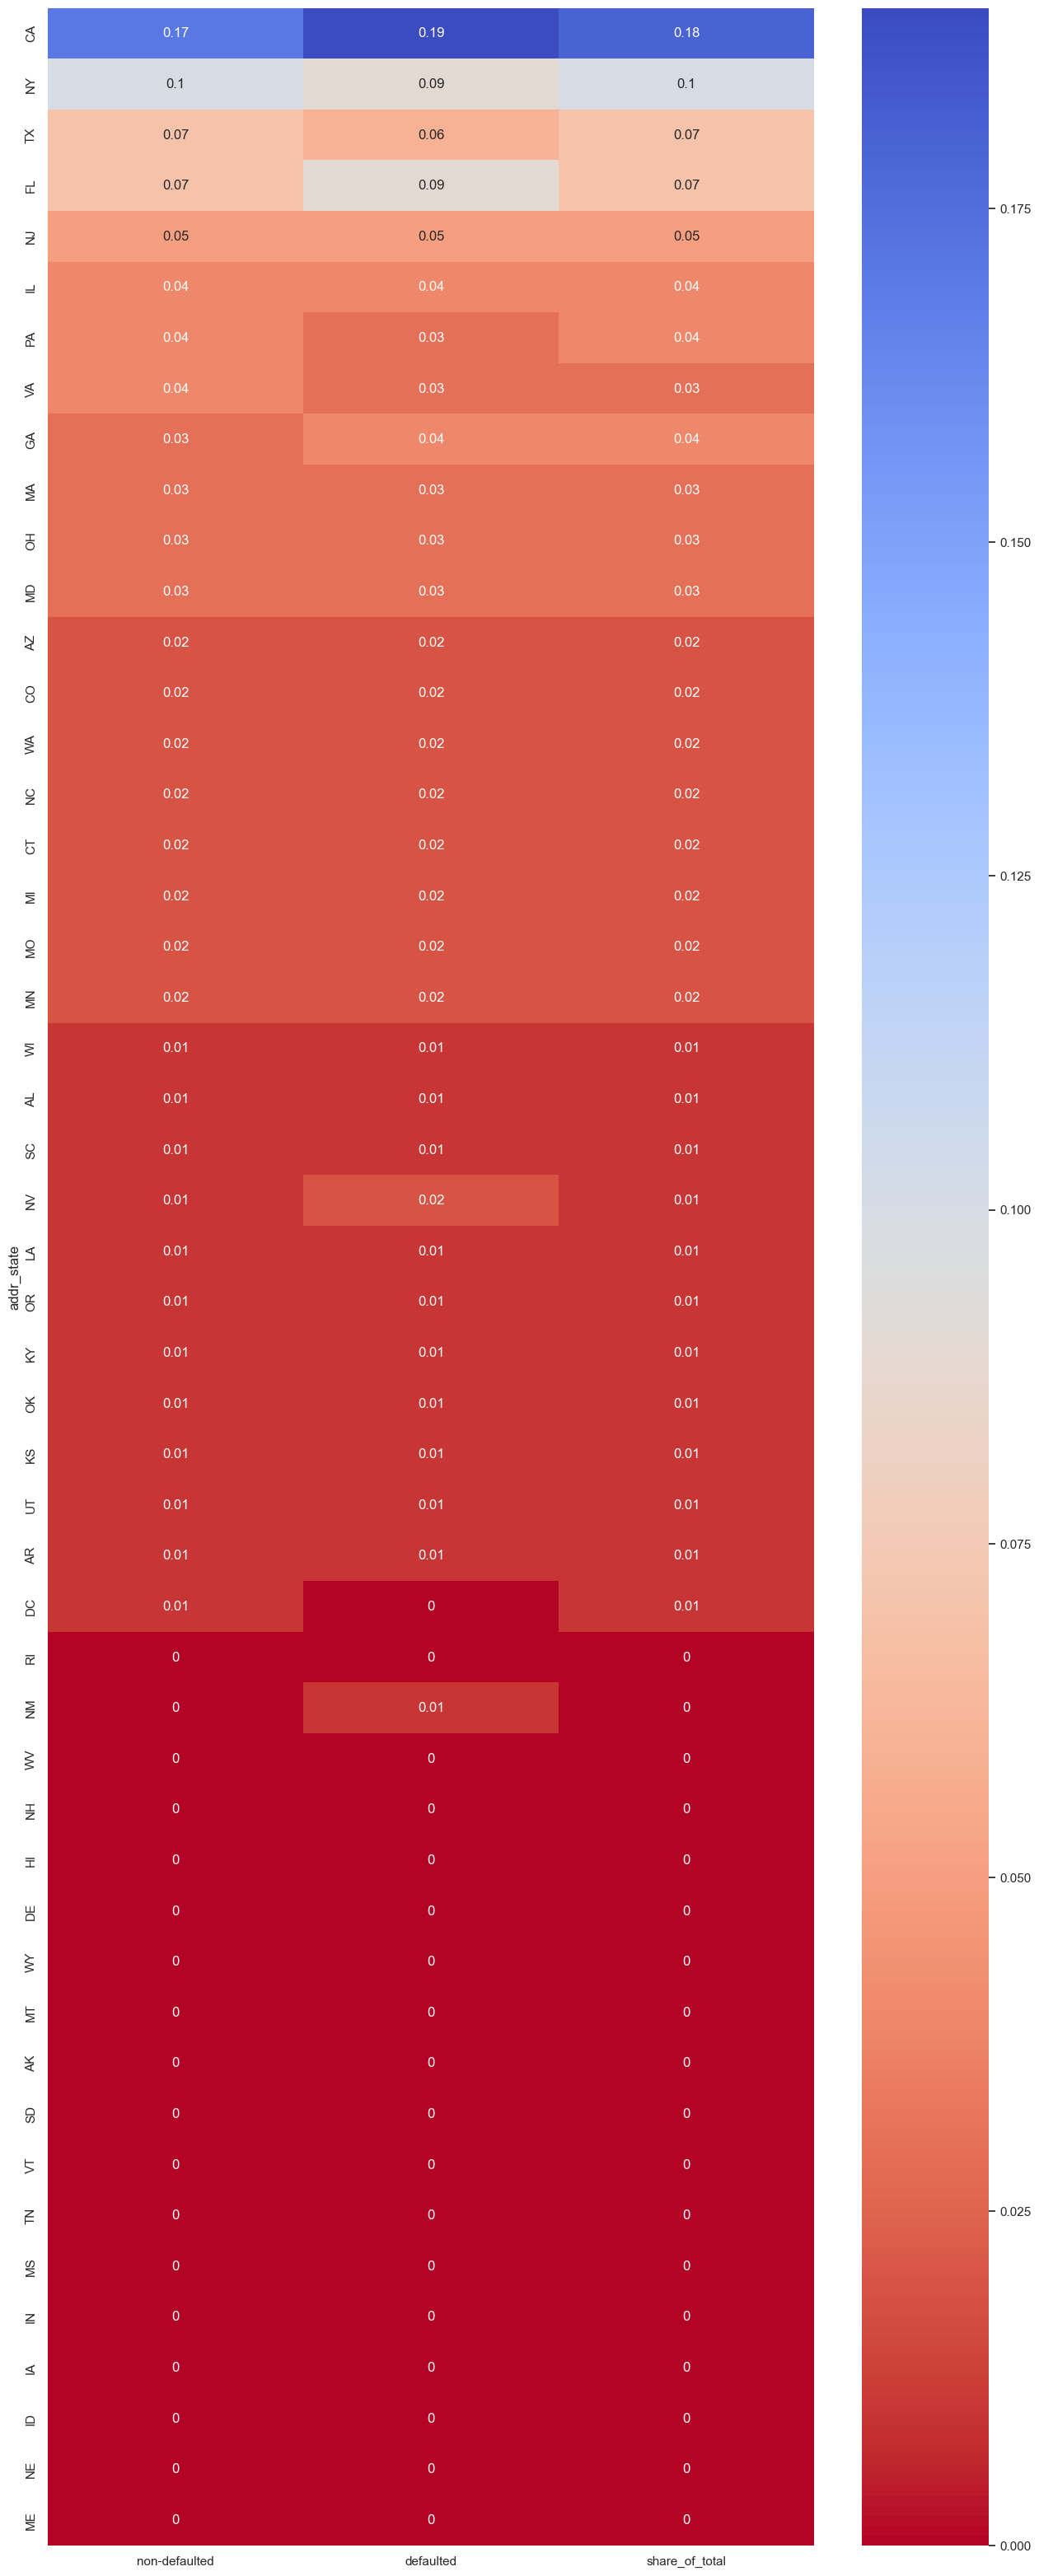

In [14]:
plt.figure(figsize=(15,40))
sns.heatmap(joined_df.round(2),annot=True, cmap='coolwarm_r');
plt.show()

Here we are observing the difference in distributions of non-defaulted and defaulted loans among the states, as well as the share of loans in comparison to other states. There most notable difference is the distribution of defaulted loans being higher in Florida.

### 2.5.2 Exploring Skewed Features<a id='2.5.2_Exploring_Skewed_Features'></a>

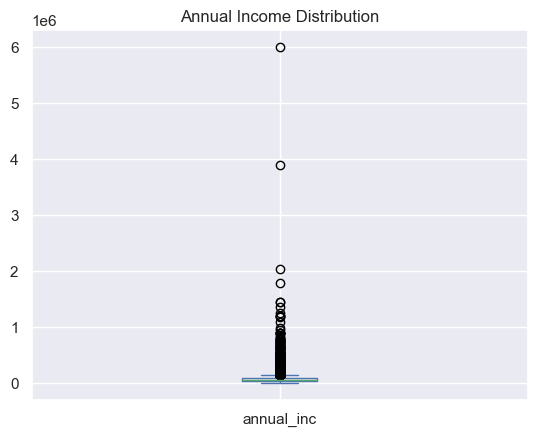

In [15]:
wrangled_data.annual_inc.plot(kind='box',title='Annual Income Distribution');

The first skewed feature we'll look at is `annual_inc`. There are several outliers in this column, which makes sense since only very little people earn high incomes. We can create a new feature by transforming the annual income by taking the log of the income.

In [16]:
wrangled_data.loc[:,'annual_inc_log'] = np.log(wrangled_data['annual_inc'])

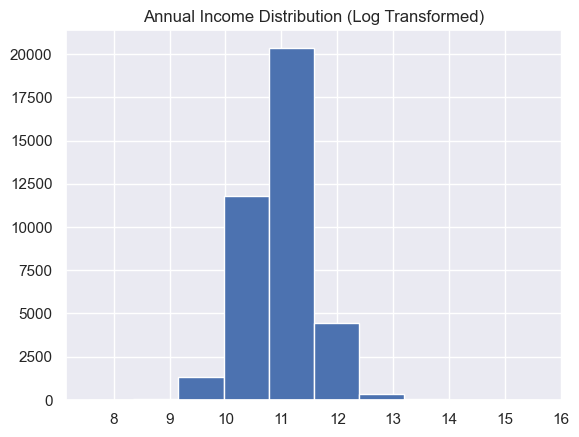

In [17]:
wrangled_data.annual_inc_log.hist();
plt.title('Annual Income Distribution (Log Transformed)')
plt.show()

The new feature is more normally distributed as expected.

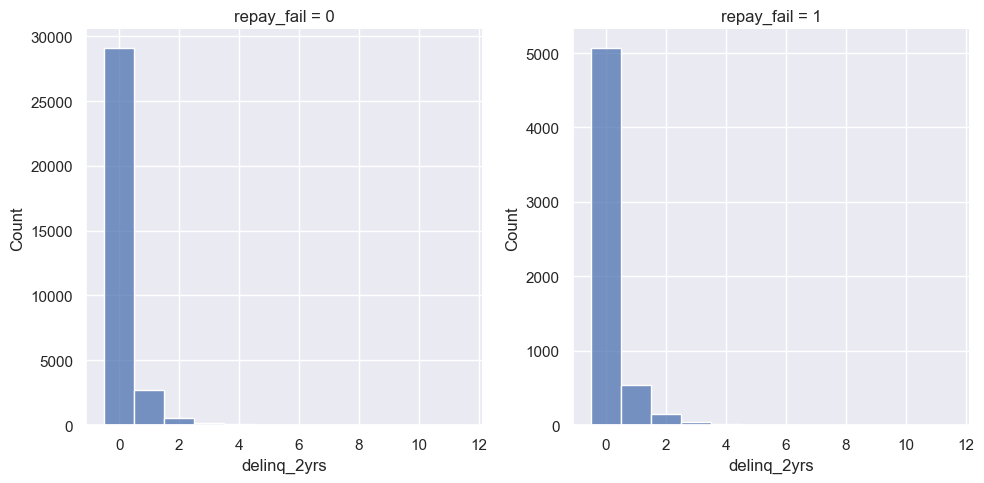

In [18]:
max_del = wrangled_data.delinq_2yrs.max()

g = sns.FacetGrid(wrangled_data, col='repay_fail', col_wrap=2, sharey=False, height=5)
g.map(sns.histplot, 'delinq_2yrs', bins=int(max_del), binwidth=1, discrete=True)
plt.show()

Here we compare the distribution of number of delinquencies in the last two years between the non-defaulted and defaulted loans. The distributions look more or less the same, although defaulted loans carry a slightly higher proportion of delinquencies.

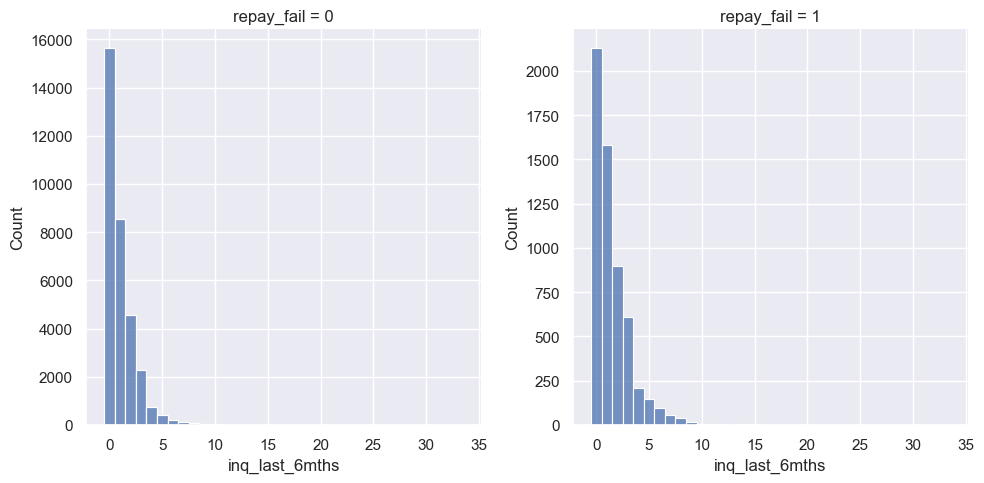

In [19]:
max_inq = wrangled_data.inq_last_6mths.max()

g = sns.FacetGrid(wrangled_data, col='repay_fail', col_wrap=2, sharey=False, height=5)
g.map(sns.histplot, 'inq_last_6mths', bins=int(max_inq), binwidth=1, discrete=True)
plt.show()

There is a notable difference between the defaulted loans and non-defaulted when it comes the amount of inquiries in the last 6 months. There is certainly a higher proportion of defaulted loans when there are more inquiries. 

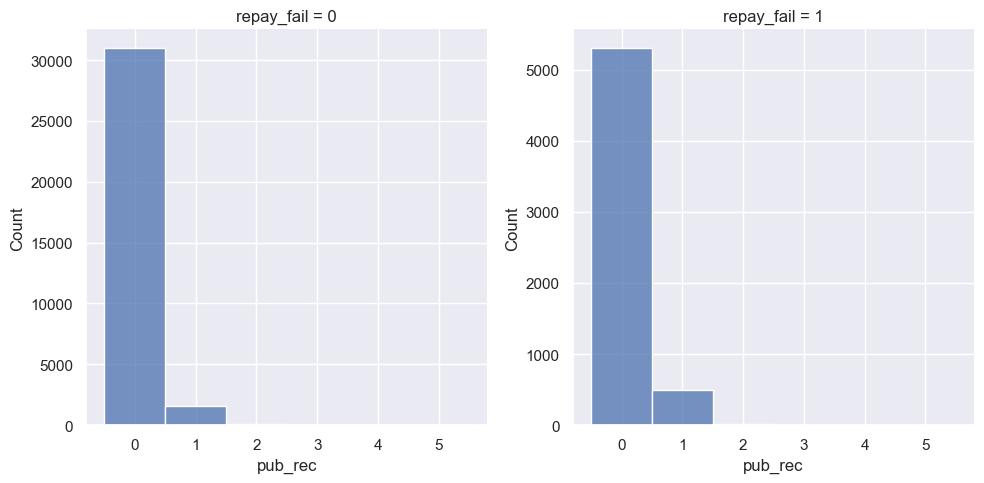

In [20]:
max_rec = wrangled_data.pub_rec.max()

g = sns.FacetGrid(wrangled_data, col='repay_fail', col_wrap=2, sharey=False, height=5)
g.map(sns.histplot, 'pub_rec', bins=int(max_rec), binwidth=1, discrete=True)
plt.show()

Similarly to the amount of inquiries, there is a slightly higher proportion of defaulted loans when there are more public records, which makes sense because a record of, for example, bankruptcy is an indicator for potential default. 

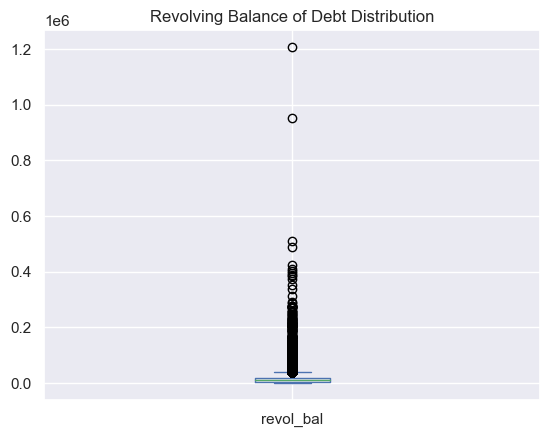

In [21]:
wrangled_data.revol_bal.plot(kind='box',title = 'Revolving Balance of Debt Distribution');

The revolving balance of debt also makes sense that it's heavily skewed since less people will carry more debt. It is likely that the same person that is carrying over \\$1.2 million in debt is also the same person who has an annual income of \\$6 million. Let's plot the annual income vs revolving balance.

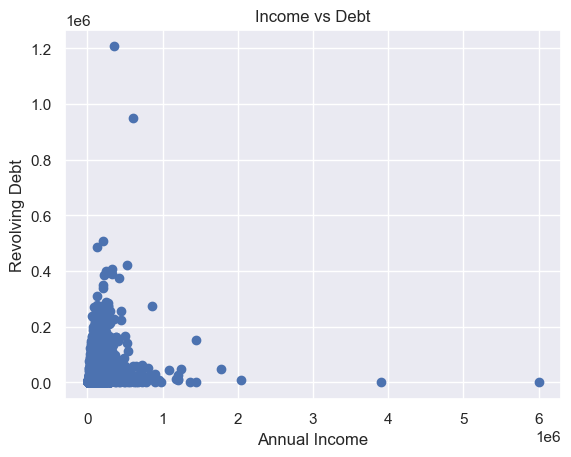

In [22]:
plt.scatter(wrangled_data.annual_inc,wrangled_data.revol_bal);
plt.title('Income vs Debt')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Debt')
plt.show()

Interestingly enough, the person who has \\$1.2 million in debt does not make anywhere near \\$6 million in annual income. As a matter of fact, they don't even make a million a year. Hopefully it all worked out for them.

In [23]:
wrangled_data.loc[:,'revol_bal_log'] = np.log(wrangled_data.loc[:,'revol_bal']+1)

We will also transform the revolving balance of debt as we did with the income.

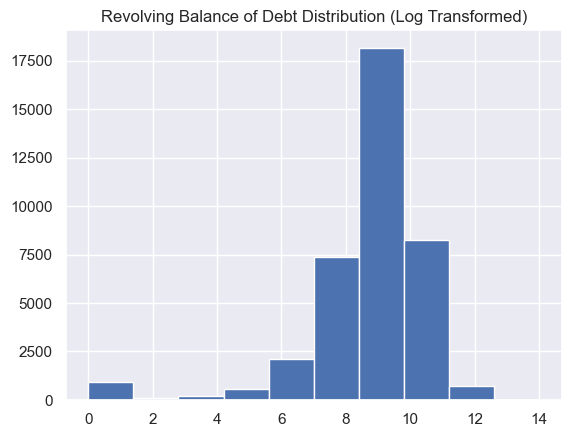

In [24]:
wrangled_data.revol_bal_log.hist();
plt.title('Revolving Balance of Debt Distribution (Log Transformed)')
plt.show()

Now the distribution is a lot more normal.

### 2.5.3 Numerical Distributions<a id='2.5.3_Numerical_Distributions'></a>

We have looked at the skewed features and compared their distributions between defaulted and non-defaulted loans. However, we can take an overall look at the numerical features and see how they compare.

First, we'll make use of `earliest_cr_line` by comparing the borrowers that have had more history of credit vs those with less history by creating a numerical column that displays the years of credit history for each borrower. Here I define a function that will return a series of showing how many years of credit each borrower had.

In [25]:
def years_of_credit(df, col):
    year_series = df[col].dt.strftime('%Y').astype(int)
    return 2000 - year_series

In [26]:
wrangled_data.loc[:,'years_of_credit'] = years_of_credit(wrangled_data,'earliest_cr_line')

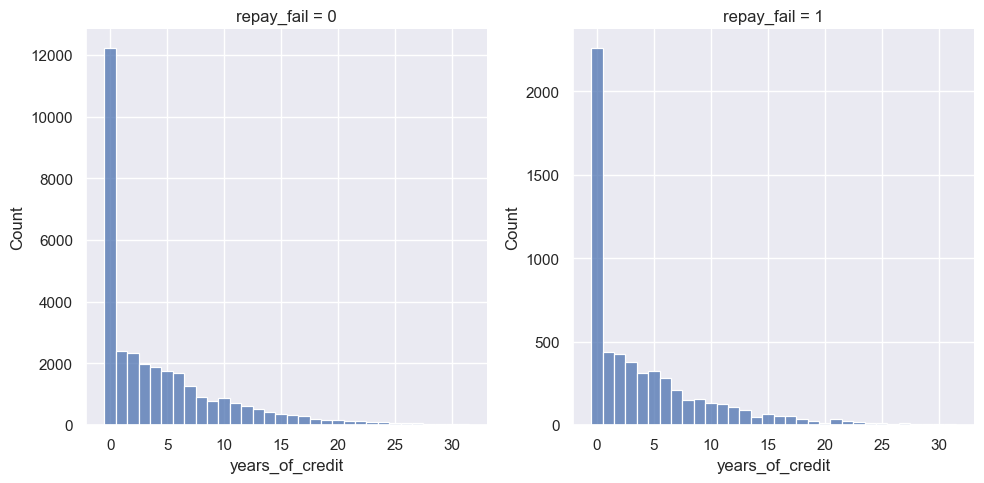

In [27]:
max_rec = wrangled_data.years_of_credit.max()

g = sns.FacetGrid(wrangled_data, col='repay_fail', col_wrap=2, sharey=False, height=5)
g.map(sns.histplot, 'years_of_credit', bins=int(max_rec), binwidth=1, discrete=True)
plt.show()

One would expect that the proportion of defaults would be higher with less years of credit, meaning the distribution on the right would be steeper; however, the distributions look slightly similar.

Now we'll create boxplots for all the numerical features to compare non-defaulted and defaulted loans. Since the data is highly skewed for some of the features, we'll plot three boxplots for each numerical feature with different parameters set to deal with the outliers. The first column will have the default settings for defining outliers, the second will only show outliers for data below the 0.01 percentile and above 0.99 percentile, and the third column will have no outliers so we can see the entire distribution. 

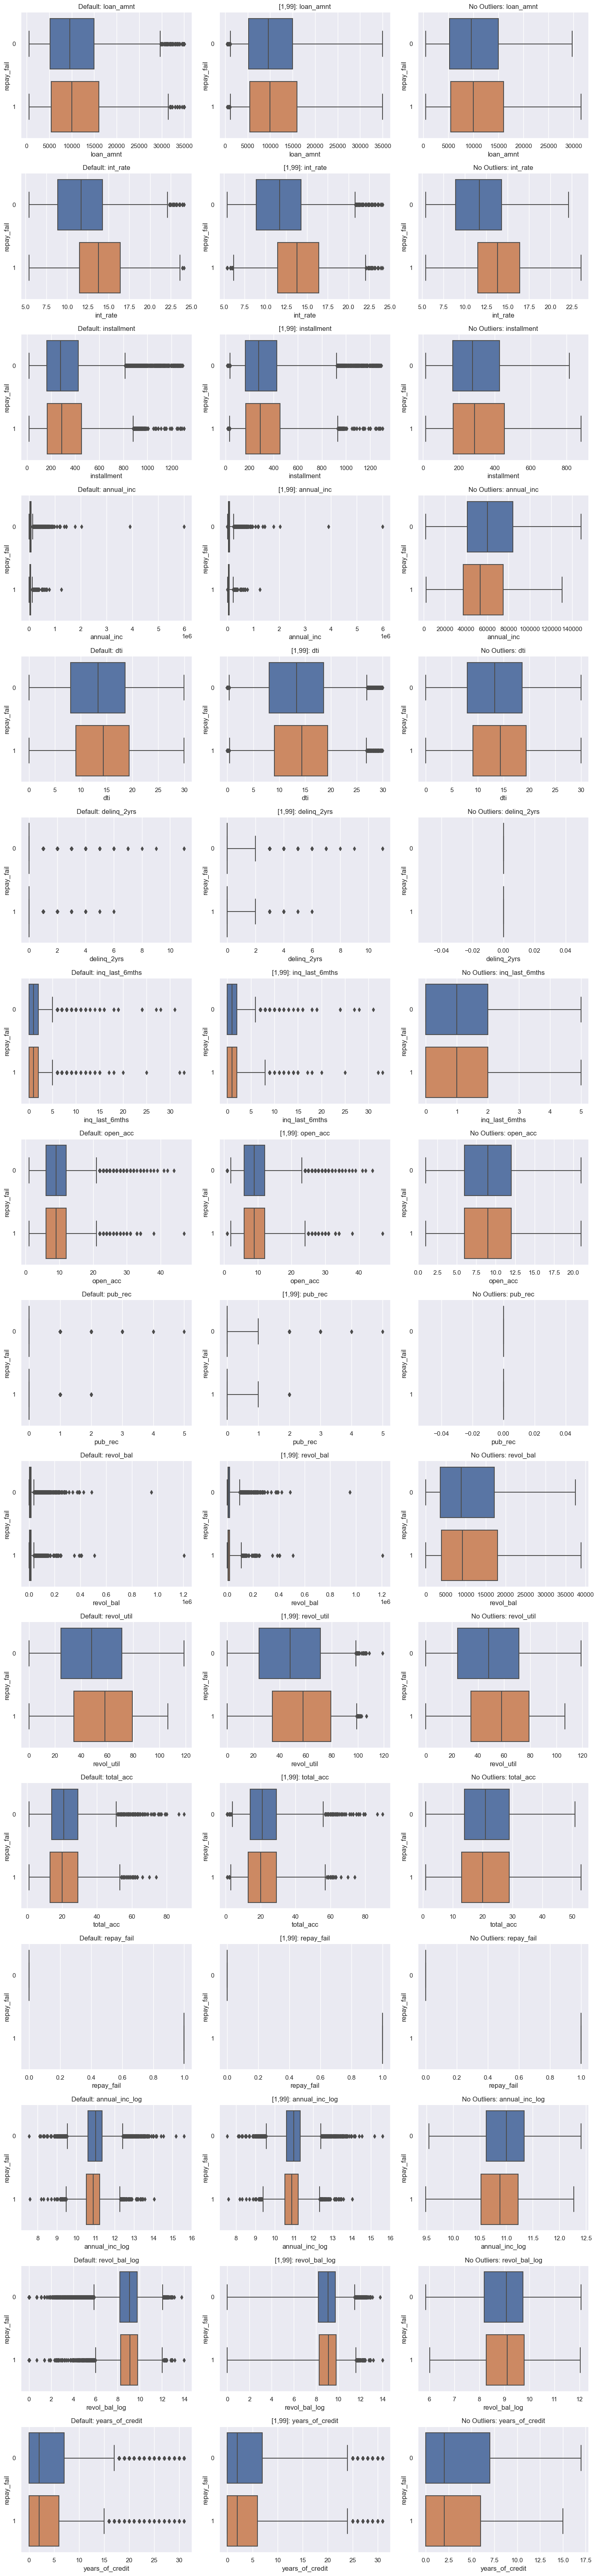

In [28]:
#numerical columns
num_cols = wrangled_data.select_dtypes(include=['int','float']).columns

#number of rows
num_rows = len(num_cols)

fig, axes = plt.subplots(num_rows, 3, figsize=(15,4*num_rows))

for idx, col in enumerate(num_cols):
    #First column: default boxplot
    sns.boxplot(y=wrangled_data.loc[:,'repay_fail'].astype('category'), x=col, data=wrangled_data, ax=axes[idx,0])
    axes[idx, 0].set_title(f'Default: {col}')
    
    #Second column: Boxplots from [1,99] percentiles
    sns.boxplot(y=wrangled_data.loc[:,'repay_fail'].astype('category'), x=col, data=wrangled_data, whis=[1,99], ax=axes[idx,1])
    axes[idx, 1].set_title(f'[1,99]: {col}')
    
    #Third column: Boxplots with no outliers
    sns.boxplot(y=wrangled_data.loc[:,'repay_fail'].astype('category'), x=col, data=wrangled_data, sym='', ax=axes[idx,2])
    axes[idx, 2].set_title(f'No Outliers: {col}')

plt.tight_layout()
plt.show()

The most notable difference in distributions between non-defaulted and defaulted loans are `int_rate`, `annual_inc` and `annual_inc_log`, `dti`, and `revol_util`. The rest of the numerical distributions have either seemingly no difference or very little.

### 2.5.4 Numerical Relationships<a id='2.5.4_Numerical_Relationships'></a>

We'll now examine the relationship between the numerical features themselves. 

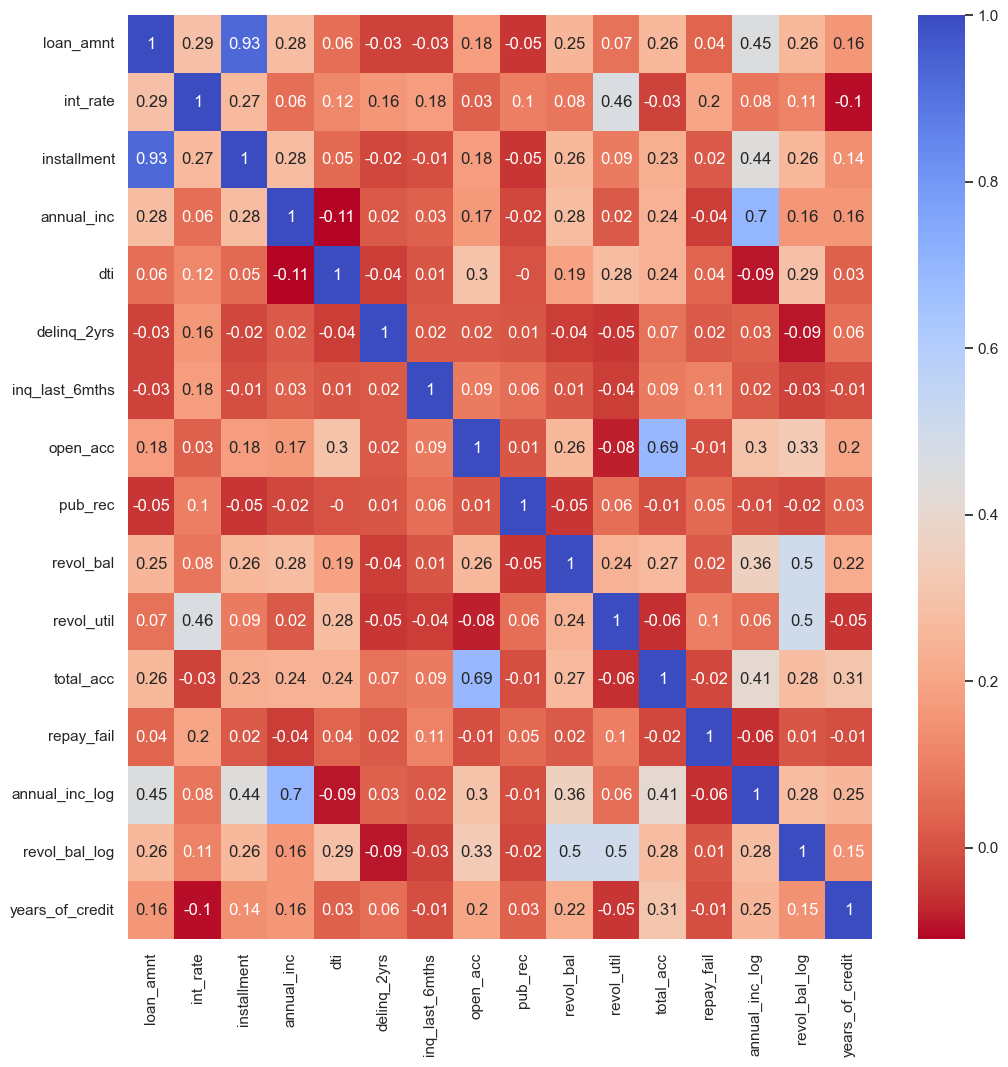

In [29]:
plt.figure(figsize=(12,12))

sns.heatmap(wrangled_data.corr(numeric_only=True).round(2), annot=True, cmap='coolwarm_r');

The highest correlation is most notably the relationship between loan amount and installment, which makes sense because the higher the loan amount, the higher the payment. We can see that the annual income feature when its not transformed showed little correlation with anything besides the annual income feature log transformed; however, the log transformed annual income has a stronger correlation to features such as loan amount (and by way also installment), and the total accounts (this shows that people with higher income typically have more credit accounts open). The log transformed revolving balance of credit feature also carries stronger relationships than its non-transformed counter part. There is a relationship present between revolving debt limit utilized and interest rate, which goes to show that utilizing lots of your credit indicates you'll receive a higher interest rate. 

### 2.5.4 Numerical-Categorical Relationships<a id='2.5.4_Numerical-Categorical_Relationships'></a>

We will also look at how categorical features and numerical features are related by grouping the categories and finding the mean and median for each numerical feature.

In [30]:
num_col = wrangled_data.select_dtypes(include=['int','float']).columns

for col in wrangled_data.select_dtypes(include='object'):
    if wrangled_data[col].nunique() <= 20:
        display(wrangled_data.groupby(col)[num_col].mean().round(2))
        display(wrangled_data.groupby(col)[num_col].median().round(2))

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
term,,,,,,,,,,,,,,,,
36 months,9562.93,11.22,311.58,67413.91,13.08,0.15,1.10,9.24,0.06,13929.91,48.02,21.49,0.12,10.94,8.64,4.24
60 months,15557.16,14.86,357.61,73708.29,14.25,0.15,1.05,9.68,0.06,15383.18,52.27,23.96,0.23,11.05,8.92,4.69


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
term,,,,,,,,,,,,,,,,
36 months,8000.0,11.14,261.32,56004.0,13.10,0.0,1.0,8.0,0.0,8253.0,48.1,20.0,0.0,10.93,9.02,2.0
60 months,14700.0,14.91,325.69,62000.0,14.44,0.0,1.0,9.0,0.0,10890.0,54.1,23.0,0.0,11.03,9.30,3.0


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
emp_length,,,,,,,,,,,,,,,,
1 year,9950.72,12.25,299.29,62461.64,13.03,0.19,1.20,9.01,0.04,12127.60,48.60,20.00,0.15,10.86,8.52,3.23
10+ years,12518.14,12.06,353.14,78400.13,13.71,0.16,1.05,9.92,0.08,18325.06,49.12,25.62,0.17,11.10,9.00,7.12
2 years,10142.00,12.23,302.39,63804.50,13.17,0.15,1.11,9.07,0.04,12579.19,48.99,20.09,0.14,10.88,8.53,3.07
3 years,10628.01,12.15,312.47,67025.56,13.26,0.14,1.08,9.10,0.05,12206.44,48.19,20.88,0.15,10.94,8.53,3.16
4 years,10979.84,12.32,322.15,66308.62,13.26,0.14,1.02,9.17,0.05,12656.73,49.70,21.05,0.14,10.95,8.63,3.27
5 years,11247.11,12.14,327.92,68275.23,13.45,0.13,1.02,9.31,0.06,13109.41,48.72,21.55,0.15,10.98,8.69,3.50
6 years,11309.76,12.19,325.80,68531.90,13.82,0.14,1.08,9.40,0.06,13859.13,49.65,22.25,0.15,10.99,8.77,3.68
7 years,11676.13,12.30,338.72,69624.00,13.79,0.15,1.04,9.38,0.07,14976.40,50.34,22.21,0.15,11.01,8.86,4.08
8 years,11836.70,12.07,341.83,74664.81,13.90,0.18,1.11,9.82,0.07,16689.25,49.13,24.16,0.15,11.06,8.90,4.60


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
emp_length,,,,,,,,,,,,,,,,
1 year,8000.0,12.23,251.71,52000.0,13.06,0.0,1.0,8.0,0.0,7292.0,49.30,18.0,0.0,10.86,8.89,1.0
10+ years,10000.0,11.86,310.10,65004.0,13.88,0.0,1.0,9.0,0.0,11763.5,49.90,24.0,0.0,11.08,9.37,6.0
2 years,8400.0,11.99,252.86,52000.0,13.33,0.0,1.0,8.0,0.0,7408.0,49.60,18.0,0.0,10.86,8.91,0.0
3 years,9000.0,11.99,271.44,55000.0,13.28,0.0,1.0,8.0,0.0,7731.0,47.80,19.0,0.0,10.92,8.95,1.0
4 years,10000.0,12.35,280.04,57500.0,13.26,0.0,1.0,8.0,0.0,8278.5,49.65,19.0,0.0,10.96,9.02,1.0
5 years,10000.0,11.99,281.12,58000.0,13.55,0.0,1.0,9.0,0.0,8696.0,48.90,20.0,0.0,10.97,9.07,1.0
6 years,10000.0,12.18,282.48,60000.0,13.97,0.0,1.0,9.0,0.0,8884.0,51.00,21.0,0.0,11.00,9.09,2.0
7 years,10000.0,12.18,301.66,60000.0,14.06,0.0,1.0,8.0,0.0,9486.0,51.70,21.0,0.0,11.00,9.16,2.0
8 years,10000.0,11.99,295.88,61100.0,13.95,0.0,1.0,9.0,0.0,10547.5,49.15,22.0,0.0,11.02,9.26,3.0


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
home_ownership,,,,,,,,,,,,,,,,
MORTGAGE,12599.68,11.94,357.49,83676.17,13.30,0.16,1.18,10.40,0.07,19017.55,47.30,26.41,0.14,11.18,9.01,5.73
OTHER,9801.77,12.81,315.09,67395.37,12.54,0.33,1.85,9.05,0.05,12894.48,46.32,20.40,0.24,10.91,8.58,4.31
OWN,10252.36,11.92,300.86,58843.57,13.31,0.17,1.09,9.00,0.05,12871.77,43.99,20.82,0.16,10.78,8.44,5.14
RENT,9846.41,12.40,295.10,56927.63,13.47,0.14,0.99,8.42,0.05,10113.58,51.66,18.32,0.16,10.80,8.49,2.93


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
home_ownership,,,,,,,,,,,,,,,,
MORTGAGE,10587.5,11.71,312.44,70095.5,13.33,0.0,1.0,10.0,0.0,11596.5,47.2,25.0,0.0,11.16,9.36,4.0
OTHER,8000.0,12.72,260.19,58600.0,11.85,0.0,1.0,8.0,0.0,9771.0,41.9,19.0,0.0,10.98,9.19,3.0
OWN,8000.0,11.83,250.70,48000.0,13.45,0.0,1.0,8.0,0.0,7263.0,42.7,19.0,0.0,10.78,8.89,3.0
RENT,8000.0,12.42,252.89,50000.0,13.65,0.0,1.0,8.0,0.0,7222.0,53.2,16.0,0.0,10.82,8.89,0.0


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
verification_status,,,,,,,,,,,,,,,,
Not Verified,8402.42,11.45,260.14,61357.82,13.13,0.15,1.17,9.09,0.06,12933.35,47.42,21.09,0.14,10.86,8.59,4.19
Source Verified,10106.19,12.17,290.28,68526.90,12.63,0.15,0.97,9.01,0.05,11676.85,49.46,20.98,0.15,10.94,8.56,3.70
Verified,15632.96,13.14,436.94,80105.20,14.30,0.15,1.05,9.98,0.06,18227.78,51.21,24.44,0.17,11.14,9.01,5.09


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
verification_status,,,,,,,,,,,,,,,,
Not Verified,7500.0,11.48,223.80,52000.0,13.25,0.0,1.0,8.0,0.0,7864.5,47.3,19.0,0.0,10.86,8.97,2.0
Source Verified,9000.0,11.99,254.54,55000.0,12.64,0.0,1.0,8.0,0.0,7597.0,49.9,19.0,0.0,10.92,8.94,1.0
Verified,15000.0,12.99,401.72,70000.0,14.50,0.0,1.0,9.0,0.0,12215.0,52.6,23.0,0.0,11.16,9.41,3.0


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
purpose,,,,,,,,,,,,,,,,
car,6809.26,10.70,192.44,61705.01,11.07,0.16,1.02,8.55,0.06,11165.83,37.19,20.42,0.11,10.87,8.11,4.45
credit_card,11648.26,11.85,346.71,70713.49,14.68,0.11,0.93,9.93,0.06,18863.53,56.68,23.27,0.12,11.02,9.33,4.69
debt_consolidation,12547.22,12.60,364.31,67256.42,14.56,0.14,1.01,9.74,0.06,15249.12,54.42,22.92,0.16,10.96,9.07,4.26
educational,6764.56,12.08,218.71,51746.80,11.14,0.17,1.78,8.74,0.05,10575.90,39.39,17.60,0.21,10.59,7.74,4.08
home_improvement,11375.53,11.58,320.41,90045.15,11.28,0.18,1.34,9.49,0.07,13186.87,37.26,24.12,0.13,11.19,8.28,5.43
house,12385.43,12.35,356.58,72978.90,10.43,0.17,1.89,8.55,0.05,10180.77,34.78,20.64,0.16,11.02,7.92,4.20
major_purchase,8091.19,10.97,235.72,65924.71,10.86,0.17,1.05,8.21,0.04,8999.22,36.07,19.67,0.10,10.90,7.84,4.04
medical,8136.78,11.60,235.52,69267.99,12.40,0.20,1.17,9.08,0.09,11968.77,42.92,21.64,0.17,10.95,8.17,4.65
moving,6518.25,11.75,193.55,59049.93,11.77,0.17,1.14,8.08,0.05,7329.03,45.12,18.47,0.16,10.78,7.71,2.90


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail,annual_inc_log,revol_bal_log,years_of_credit
purpose,,,,,,,,,,,,,,,,
car,6000.0,10.59,162.81,54000.0,10.48,0.0,1.0,8.0,0.0,5026.0,32.00,18.0,0.0,10.90,8.52,2.0
credit_card,10000.0,11.71,310.10,60000.0,14.79,0.0,0.0,9.0,0.0,13203.5,59.10,21.0,0.0,11.00,9.49,3.0
debt_consolidation,11050.0,12.61,327.36,58000.0,14.74,0.0,1.0,9.0,0.0,10728.0,55.70,21.0,0.0,10.97,9.28,2.0
educational,5000.0,12.21,170.38,40800.0,10.71,0.0,1.0,8.0,0.0,3741.0,37.00,15.0,0.0,10.62,8.23,1.0
home_improvement,9600.0,11.48,264.56,72000.0,10.78,0.0,1.0,9.0,0.0,6413.5,33.12,23.0,0.0,11.18,8.77,4.0
house,10000.0,11.94,312.40,60000.0,10.07,0.0,1.0,8.0,0.0,4551.5,30.20,19.0,0.0,11.00,8.42,2.0
major_purchase,6000.0,10.99,186.86,54084.0,10.50,0.0,1.0,7.0,0.0,4191.0,31.20,17.0,0.0,10.90,8.34,2.0
medical,6000.0,11.49,190.47,55600.0,12.46,0.0,1.0,8.0,0.0,5069.0,40.10,19.0,0.0,10.93,8.53,3.0
moving,4975.0,11.49,154.81,48000.0,11.60,0.0,1.0,7.0,0.0,4034.0,42.10,16.0,0.0,10.78,8.30,0.0


Every numerical feature seems to be higher in both mean and median for 60 month terms. We can see that the average of `repay_fail` is higher for 60 month terms, as confirmed earlier in the distributions. The most notable differences in employment length are the annual income and balance of debt, the longer length of employment means a higher average of annual income and, subsequently, average revolving balance. People who have a mortgage also have a higher average and median income, which is associated to a higher revolving balance. Renters have a higher utilization of their credit limit, which is associated with a higher rate of default. All this is consistent with the charts we saw earlier.

The verification status of income shows that verified income had a higher average and median annual income than non-verified income. Although generally, a lower income is associated with more defaults, one crucial piece of information that isn't included in the data is the credit score. Verifying income is likely a measure of security for lower credit scores, and therefore could be the reason why incomes that must be verified carry a higher average of defaults.

From analyzing the purpose of the loan versus the numerical features, it is evident that the highest average of defaults is carried by small business loans, as observed earlier. Besides the small business loans carrying a higher default rate, loans for debt consolidation and credit card debt have high revolving debt utilization, which is consistent with their purpose since people who obtain loans for that purpose will very likely have high balance of credit and want to consolidate it.

## 2.6 Saving The Data<a id='2.6_Saving_The_Data'><a>

In [31]:
wrangled_data.to_csv('../data/processed/explored_data.csv')

## 2.7 References<a id='2.7_References'></a>

1. Susan Maina - 13 Key Code Blocks for EDA-Classification Task (https://medium.com/p/94890622be57)